In [1]:
import json
import pandas as pd

# Importing Country Traveling Info
with open('TravelAdvisory.json', 'r') as f:
    country_data = pd.DataFrame(json.load(f)['entry'])

In [2]:
def merge_dicts(list_of_dicts):
    temp_dict = {}
    for dictionary in list_of_dicts:
        temp_dict.update(dictionary)
        
    return temp_dict

def split_title(text):
    temp_data = text.split(" - ")
    return {"country": temp_data[0], "travel_advisory": temp_data[1]}

In [3]:
# Data cleaning and reformatting

country_data = country_data.drop(country_data.index[4])
country_data = country_data.reset_index(drop=True)
country_data['link'] = country_data['link'].apply(lambda x: x['@href'])
country_data['category'] = country_data['category'].apply(lambda x: [x] if isinstance(x, dict) else x)
country_data['category'] = country_data['category'].apply(lambda x: merge_dicts(x))
country_data['published'] = pd.to_datetime(country_data['published'])
country_data['updated'] = pd.to_datetime(country_data['updated'])

country_data = pd.concat([country_data.drop(['title'], axis=1), country_data['title'].apply(split_title).apply(pd.Series)], axis=1)
country_data['travel_advisory_code'] = country_data['travel_advisory'].apply(lambda x: x.split(":")[0][-1])

In [44]:
# To get Country codes and drop columns that are not needed.
country_codes = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
country_codes = df.drop(["GDP (BILLIONS)"], axis=1)

In [46]:
tad = country_data[['country', 'travel_advisory_code', 'summary', 'updated']]

# Manually map some of the countries that have slightly differntly formatted names
# e.g. "Bahamas, The" vs "The Bahamas"
tad.at[3, 'country']="Burma"
tad.at[205, 'country']="Congo, Democratic Republic of the"
tad.at[206, 'country']="Congo, Republic of the"
tad.at[192, 'country']="Cote d'Ivoire"
tad.at[0, 'country']="Macedonia"
tad.at[174, 'country']="Bahamas, The"
tad.at[100, 'country']="Korea, North"
tad.at[101, 'country']="Korea, South"
tad.at[202, 'country']="Gambia, The"
tad.at[99, 'country']="Kenya"
tad.at[118, 'country']="Micronesia, Federated States of"
tad.at[76, 'country']="Curacao"
tad.at[95, 'country']="Israel"
tad.at[77, 'country']="Saint Martin"

map_data = country_codes.merge(tad, how='left', left_on='COUNTRY', right_on="country")
tad_data = tad.merge(country_codes, how='left', left_on="country", right_on="COUNTRY")

# Since there are datapoints that share advisory data, manually set them
# e.g. "Israel, West Bank and Gaza" => "Israel" & "West Bank"
map_data.at[3, 'travel_advisory_code']=1
map_data.at[81, 'travel_advisory_code']=1
map_data.at[161, 'travel_advisory_code']=1
map_data.at[211, 'travel_advisory_code']=1
map_data.at[217, 'travel_advisory_code']=1
map_data.at[149, 'travel_advisory_code']=1

map_data.at[218, 'travel_advisory_code']=2
#df.head()

In [38]:
# Used to find the datapoints that are not mapping.
map_data[pd.isna(map_data['travel_advisory_code'])]

,COUNTRY,GDP (BILLIONS),CODE,country,travel_advisory_code,updated
47,Cook Islands,0.18,COK,NaN,NaN,NaT
66,Falkland Islands (Islas Malvinas),0.16,FLK,NaN,NaN,NaT
67,Faroe Islands,2.32,FRO,NaN,NaN,NaT
77,Gibraltar,1.85,GIB,NaN,NaN,NaT
79,Greenland,2.16,GRL,NaN,NaN,NaT
83,Guernsey,2.74,GGY,NaN,NaN,NaT
97,Isle of Man,4.08,IMN,NaN,NaN,NaT
102,Jersey,5.77,JEY,NaN,NaN,NaT
118,Liechtenstein,5.11,LIE,NaN,NaN,NaT
135,Monaco,6.06,MCO,NaN,NaN,NaT


In [39]:
# Used to find the datapoints that are not mapping.
tad_data[pd.isna(tad_data['COUNTRY'])]

,country,travel_advisory_code,updated,COUNTRY,GDP (BILLIONS),CODE
1,Nauru,1,2019-04-02 20:14:57.838000+00:00,NaN,NaN,NaN
10,Antarctica,2,2019-01-10 13:31:18.747000+00:00,NaN,NaN,NaN
20,Eswatini,1,2019-07-08 18:39:43.054000+00:00,NaN,NaN,NaN
73,"Bonaire, Sint Eustatius, and Saba",1,2019-01-08 15:14:22.737000+00:00,NaN,NaN,NaN
78,Montserrat,1,2019-02-26 16:16:34.133000+00:00,NaN,NaN,NaN
85,Turks and Caicos Islands,2,2019-07-08 15:19:05.696000+00:00,NaN,NaN,NaN
168,French Guiana,1,2019-07-08 18:42:39.132000+00:00,NaN,NaN,NaN


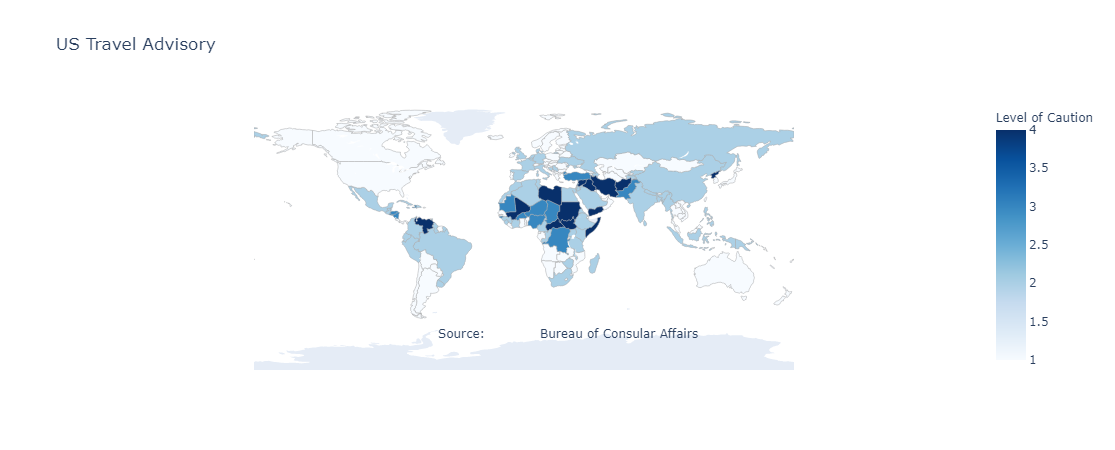

In [47]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations = map_data['CODE'],
    z = map_data['travel_advisory_code'],
    text = map_data['COUNTRY'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    colorbar_title = 'Level of Caution',
))

fig.update_layout(
    title_text='US Travel Advisory',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://cadatacatalog.state.gov/dataset/travel">\
            Bureau of Consular Affairs</a>',
        showarrow = False
    )]
)

fig.show()